<a href="https://colab.research.google.com/github/JLuisSanchez/Data-Science-AI---Master-Devf/blob/main/Entregable_Final_El_Deportista_Mejor_Pagado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EQUIPO DINAMITA 💣 B-16 DATA B

### Sánchez Gutiérrez José Luis
### Anzures Beltrán Saúl Eduardo
### Antonio Manuel Polet del Rosario

In [ ]:
#Importar paquetes para manejo de datos
import numpy as np
import pandas as pd
from datetime import datetime

#Importar paquetes de visualización
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
#import pycountry as pc
import folium 
from folium import plugins


import numpy as np
from PIL import Image


import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5


# Disable warnings in Anaconda
#import warning
#warnings.filterwarnings('ignore')
#import os

In [ ]:
#Lectura del archivo CSV y uso de head() para conocer los 5 primeros casos de la base
df = pd.read_csv("/content/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [ ]:
#Creación de una copia de df para eliminar la columna S.NO
df1 = df.copy()
df1.drop("S.NO", axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [ ]:
# Convertir year de int a formato fecha
df1['Year'] = df1['Year'].apply(pd.to_datetime,format='%Y')
df1.info()

#Definir la columna de fecha como Index del DataFrame
df1['year'] = pd.DatetimeIndex(df1['Year']).year  
df1.set_index('year', inplace=True)
df1.drop('Year',axis=1,inplace=True)
df1.head()

# Conversión de la columna de deportes en mayusculas.
df1['Sport'] = df1['Sport'].str.upper()
df1.head()

In [ ]:
data_2020 = df1[df1.index == 2020]

trace = go.Bar(
                    x = data_2020["earnings ($ million)"],
                    y = data_2020['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2020",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
# Top Paid Athlete for Each Year
Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

z.style.background_gradient(cmap='Blues') 

,Name,Sport,Nationality,earnings ($ million)
year,,,,
2020,Roger Federer,TENNIS,Switzerland,106.300000
2019,Lionel Messi,SOCCER,Argentina,127.000000
2018,Floyd Mayweather,BOXING,USA,285.000000
2017,Cristiano Ronaldo,SOCCER,Portugal,93.000000
2016,Cristiano Ronaldo,SOCCER,Portugal,88.000000
2015,Floyd Mayweather,BOXING,USA,300.000000
2014,Floyd Mayweather,BOXING,USA,105.000000
2013,Tiger Woods,GOLF,USA,78.100000
2012,Floyd Mayweather,BOXING,USA,85.000000


In [ ]:
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()
counts_top

trace = go.Bar(
                    y = counts_top.index,
                    x = counts_top['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )

data = [trace]
layout = go.Layout(barmode = "group",title='Athlete earning the most,maximum number of times',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
# Top Paid Athlete for Each Year
total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
total_earnings
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Name')
df_compare

,Name,earnings ($ million),Rank_counts
0,Cristiano Ronaldo,181.0,2
1,Evander Holyfield,60.5,1
2,Floyd Mayweather,775.0,4
3,Lionel Messi,127.0,1
4,Michael Jordan,293.1,6
5,Michael Schumacher,108.0,2
6,Mike Tyson,103.6,2
7,Roger Federer,106.3,1
8,Tiger Woods,987.4,11


In [ ]:
import plotly.graph_objs as go
from plotly import tools
trace0 = go.Bar(
                y=df_compare['Name'],
                x=df_compare['Rank_counts'],
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Top Ranks',
                orientation='h',
)

trace1 = go.Scatter(
                y=df_compare['Name'],
                x=df_compare['earnings ($ million)'],
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)

layout = dict(
                title='Income and Top Ranks',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=False,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = df_compare['Rank_counts']
y_nw = np.rint(df_compare['earnings ($ million)'])
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, df_compare['Name']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-1,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+1,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
#Pais que produce los máximos generadores de ingreso en deporte.
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()

trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top['Nationality'] ,
                    orientation='v',
                    marker = dict(color='green',
                                 line=dict(color='pink',width=5)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which produces the maximum earners in Sports',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
#¿Cuánto ingresan los mejores atletas cada año?
trace = go.Scatter(
                    x = Top_paid_each_year.index,
                    y = Top_paid_each_year['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
data = [trace]
layout = go.Layout(title='How much did the Top Paid Athlete for Each Year, earn? ',width=800, height=500, 
                       xaxis= dict(title='Years'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
#¿Cuánto ingresan los mejores atletas cada año?
df['Sport'] = df['Sport'].str.upper() # Conversión del texto a mayúsculas.
max_sport = df['Sport'].value_counts().to_frame()

trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Sport'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Sport which dominates in earnings',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
#Pais que más ingresos tiene en deportes
max_sport_income = df['Nationality'].value_counts().to_frame()

trace = go.Bar(
                    y = max_sport_income.index,
                    x = max_sport_income['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which dominates in Sports earningss',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
#Atletas que aparecen más frecuentemente en la lista
s = df['Name'].value_counts().to_frame()[:5]
s.style.background_gradient(cmap='Reds')  

,Name
Tiger Woods,19
Michael Jordan,19
Kobe Bryant,14
LeBron James,13
Michael Schumacher,13


In [ ]:
#¿Dónde se encuentran las mujeres?
#Monica Seles es la única mujer que ha aparecido en la lista de los deportistas 10 mejores pagados hasta ahora, y lo hizo en 1992.

# People who have appeared once on the list.
names = df['Name'].value_counts().to_frame()
names[names['Name']==1].index

# On scanning the list, we find the name of a sole women athlete- monica seles
monica = df[df['Name'] == 'Monica Seles']
monica.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
29,30,Monica Seles,USA,10,12,TENNIS,1992,8.500000


In [ ]:
#Analizando a los 3 mejores pagados de todos los tiempos.
top_earners_alltime = pd.pivot_table(df, index='Name',values="earnings ($ million)", aggfunc='sum')

top3_earners_all = top_earners_alltime.sort_values(by="earnings ($ million)",ascending=False)[:3]

top3_earners_all.style.background_gradient(cmap='Reds')  

,earnings ($ million)
Name,
Tiger Woods,1373.800000
LeBron James,844.800000
Floyd Mayweather,840.000000


In [ ]:
#Analizando los ingresos de Tiger Woods a lo largo de los años
def earnings_plot(dataframe,athlete,image_path,opacity):
    """
    function that creates a plotly line chart with image of the athlete in the background
    
    
    """
    athlete_df = df1[df1['Name'] == athlete]

    trace = go.Scatter(
                    x = athlete_df.index,
                    y = athlete_df['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='red',width=6)),
                    )
    data = [trace]
    layout= go.Layout(title= f'{athlete}' +"'s earnings over the Years",
                  xaxis=dict(title='Year'),
                  yaxis=dict(title="Earnings in US$ (millions)"),
                  images= [dict(
                          source=Image.open(image_path),
                          xref= "paper",
                          yref= "paper",
                          x= 0.5,
                          y= 0.5,
                          sizex= 1,
                          sizey= 1,
                          sizing= "stretch",
                          opacity= opacity,
                          xanchor= "center", 
                          yanchor="middle",
                          layer= "below")])
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


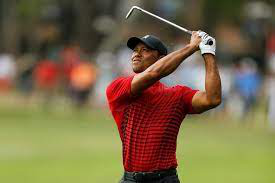

In [ ]:
image_path = "/content/TW.jpg"
earnings_plot(df1,'Tiger Woods',image_path,opacity=0.3)


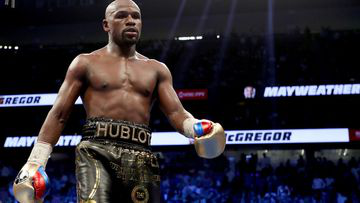

In [ ]:
#Analizando los ingresos de Floyd Mayweather a lo largo de los años
image_path = "/content/Floyd Mayweather.jpg"
earnings_plot(df1,'Floyd Mayweather',image_path,opacity=0.2)


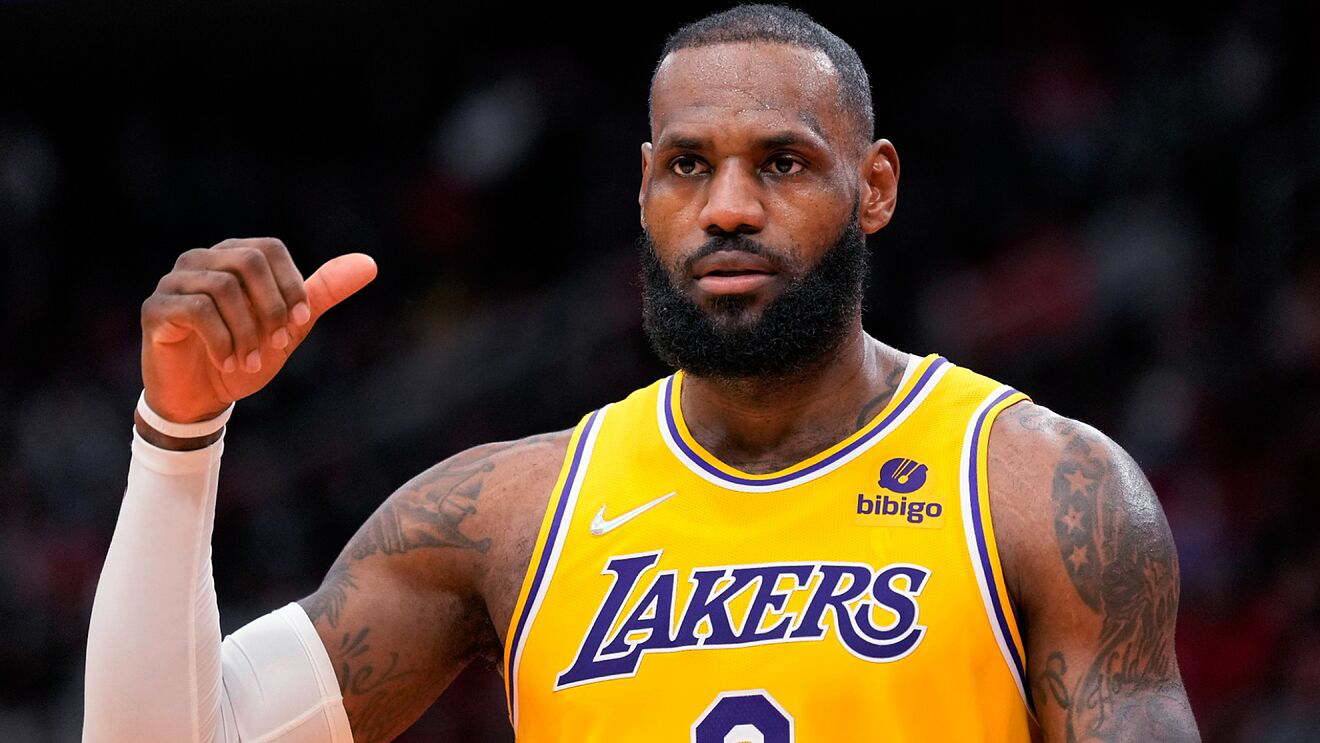

In [ ]:
#Analizando los ingresos de Lebron James a lo largo de los años
image_path = "/content/Lebron James.jpg"
earnings_plot(df1,'Floyd Mayweather',image_path,opacity=0.2)

# 8. ¡Es tu momento de brillar🚀!

#1. Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020. ✅💣

In [ ]:
p1 = df.copy()
p1.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [ ]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [ ]:
p1["Previous Year Rank"].unique()
p1["Current Rank"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#Limpieza de la variable 'Previous Year Rank'
#p1.drop('S.NO',axis=1,inplace=True)
p1['Previous Year Rank'] = p1['Previous Year Rank'].str.replace('>100', '150')
p1['Previous Year Rank'] = p1['Previous Year Rank'].str.replace('>10', '15')
p1['Previous Year Rank'] = p1['Previous Year Rank'].str.replace('>14', '18')
p1['Previous Year Rank'] = p1['Previous Year Rank'].str.replace('>20', '25')
p1['Previous Year Rank'] = p1['Previous Year Rank'].str.replace('>30', '35')
p1['Previous Year Rank'] = p1['Previous Year Rank'].str.replace('>40', '45')
p1['Previous Year Rank'] = p1['Previous Year Rank'].astype(str).replace(['nan','<NA>','?','??','none', 'not ranked', None], '-1000')
p1

#Cambiar la variable Previous Year Rank a tipo INT
p1['Previous Year Rank'] = p1['Previous Year Rank'].astype(int) #ASTYPE
p1

#Crear una nueva columa para detectar aumento de lugares
p1["ra_aumento"] = p1["Previous Year Rank"] - p1["Current Rank"]
p1

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),ra_aumento
0,1,Mike Tyson,USA,1,-1000,boxing,1990,28.6,-1001
1,2,Buster Douglas,USA,2,-1000,boxing,1990,26.0,-1002
2,3,Sugar Ray Leonard,USA,3,-1000,boxing,1990,13.0,-1003
3,4,Ayrton Senna,Brazil,4,-1000,auto racing,1990,10.0,-1004
4,5,Alain Prost,France,5,-1000,auto racing,1990,9.0,-1005
...,...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4,3
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9,3
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3,3
299,300,Kirk Cousins,USA,9,150,American Football,2020,60.5,141


In [ ]:
#Se hace un filtro para obtener a aquellos deportistas que subieron al menos dos lugares entre 2010 y 2020.
p1 = p1[p1["ra_aumento"] >= 2]
p1 = p1[p1.Year >= 2010]
p1

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),ra_aumento
192,193,Floyd Mayweather,USA,2,15,boxing,2010,65.0,13
194,195,Phil Mickelson,USA,4,6,golf,2010,46.0,2
196,197,Roger Federer,Switzerland,6,15,tennis,2010,43.0,9
199,200,Eli Manning,USA,9,15,American Football,2010,39.9,6
200,201,Terrell Suggs,USA,10,15,American Football,2010,38.3,5
203,204,LeBron James,USA,3,7,basketball,2011,48.0,4
204,205,Roger Federer,Switzerland,4,6,tennis,2011,47.0,2
207,208,Cristiano Ronaldo,Portugal,7,13,soccer,2011,38.0,6
208,209,Alex Rodriguez,Dominican,8,12,baseball,2011,35.0,4
209,210,Michael Schumacher,Germany,9,25,F1 racing,2011,34.0,16


#2. Atleta con el menor número de apariciones y mayores ganancias. ✅💣

In [ ]:
#Conteo de atletas y ganancias
conteo = df1['Name'].value_counts().to_frame().reset_index()

#Definición de una mascara con los nombres de los atletas que tienen menor número de apariciones (iguales a 1)
mask = conteo[conteo["Name"] == 1]
mask.rename(columns={'index':'Nombre'},inplace=True)
mask.rename(columns={'Name':'Aparicion'},inplace=True)
mask = mask["Nombre"].to_list()
mask

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['Matthew Stafford',
 'Aaron Rodgers',
 'Rafael Nadal',
 'Kirk Cousins',
 'Aaron Rogers',
 'Novak Djokovic',
 'Jordan Spieth',
 'Cam Newton',
 'Canelo Alvarez',
 'Andrew Luck',
 'Rory McIlroy',
 'Drew Brees',
 'James Harden',
 'Lewis Hamilton',
 'Russell Wilson',
 'Conor McGregor',
 'Deion Sanders',
 'Donovan "Razor" Ruddock',
 'Terrell Suggs',
 'Eli Manning',
 'Emmit Smith',
 'Dennis Rodman',
 'Gerhard Berger',
 'Joe Sakic',
 'Cecil Fielder',
 'Sergei Federov',
 'Gary Sheffield',
 'Jeff Gordon',
 'Buster Douglas',
 'Monica Seles',
 'Michael Vick',
 'Lance Armstrong',
 'Muhammad Ali',
 'Tom Brady',
 'Michael Moorer',
 'Dale Earnhardt Jr.',
 'Greg Norman',
 'Carson Wentz']

In [ ]:
#Dataset con valores de interés filtrados
p2 = df.copy()
#p2 = p2[["Name", "earnings ($ million)"]]
p2

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [ ]:
#Uso de mask en Dataset filtrado, búsqueda de coincidencias con atletas con menos apariciones 
filtered_df = p2[p2.Name.isin(mask)]
filtered_df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
16,17,"Donovan ""Razor"" Ruddock",Canada,7,>30,boxing,1991,10.2
29,30,Monica Seles,USA,10,12,Tennis,1992,8.5
37,38,Cecil Fielder,USA,8,40,Baseball,1993,12.7
44,45,Gerhard Berger,Austria,5,30,Auto Racing,1994,13.5
46,47,Michael Moorer,USA,7,>40,Boxing,1994,12.1
52,53,Deion Sanders,USA,3,38,American Football / Baseball,1995,22.5
64,65,Emmit Smith,USA,5,not ranked,NFL,1996,16.5
68,69,Dennis Rodman,USA,9,not ranked,Basketball,1996,12.9


In [ ]:
#Ordenamiento de valores por earnings ($ million)
result_p2 = filtered_df.sort_values("earnings ($ million)", ascending=False)
result_p2

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
274,275,Conor McGregor,Ireland,4,24,MMA,2018,99.0
284,285,Canelo Alvarez,Mexico,4,15,Boxing,2019,94.0
286,287,Russell Wilson,USA,6,??,American Football,2019,89.5
287,288,Aaron Rogers,USA,7,??,American Football,2019,89.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
280,281,Matthew Stafford,USA,10,>100,American Football,2018,59.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1
256,257,Novak Djokovic,Serbia,6,13,Tennis,2016,55.8
153,154,Muhammad Ali,USA,3,>10,boxing,2006,55.0
257,258,Cam Newton,USA,7,>20,American Football,2016,53.1


#3. Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados. ✅💣

In [ ]:
p3 = df1.copy()
p3['Previous Year Rank'] = p3['Previous Year Rank'].astype(str).replace(['nan','<NA>','?','??','none', 'not ranked', None], 'not ranked')
p3

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,not ranked,BOXING,28.6
1990,Buster Douglas,USA,2,not ranked,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,not ranked,BOXING,13.0
1990,Ayrton Senna,Brazil,4,not ranked,AUTO RACING,10.0
1990,Alain Prost,France,5,not ranked,AUTO RACING,9.0
...,...,...,...,...,...,...
2020,Stephen Curry,USA,6,9,BASKETBALL,74.4
2020,Kevin Durant,USA,7,10,BASKETBALL,63.9
2020,Tiger Woods,USA,8,11,GOLF,62.3


In [ ]:
#Filtrar a los no rankeados
filter = p3[p3["Previous Year Rank"] == "not ranked"]
filter

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,not ranked,BOXING,28.6
1990,Buster Douglas,USA,2,not ranked,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,not ranked,BOXING,13.0
1990,Ayrton Senna,Brazil,4,not ranked,AUTO RACING,10.0
1990,Alain Prost,France,5,not ranked,AUTO RACING,9.0
1990,Jack Nicklaus,USA,6,not ranked,GOLF,8.6
1990,Greg Norman,Australia,7,not ranked,GOLF,8.5
1990,Michael Jordan,USA,8,not ranked,BASKETBALL,8.1
1990,Arnold Palmer,USA,8,not ranked,GOLF,8.1


In [ ]:
#Ordenar por nacionalidad
p3_result = filter.groupby(['Nationality', 'Name'])['Sport'].value_counts().to_frame()
p3_result

Sport
Nationality Name               Sport                   
Australia   Greg Norman        GOLF                   1
Brazil      Ayrton Senna       AUTO RACING            1
Canada      Joe Sakic          HOCKEY                 1
France      Alain Prost        AUTO RACING            1
Germany     Michael Schumacher F1 MOTORSPORTS         1
Russia      Sergei Federov     ICE HOCKEY             1
UK          Lewis Hamilton     AUTO RACING            1
USA         Aaron Rodgers      AMERICAN FOOTBALL      1
            Aaron Rogers       AMERICAN FOOTBALL      1
            Andrew Luck        AMERICAN FOOTBALL      1
            Arnold Palmer      GOLF                   2
            Buster Douglas     BOXING                 1
            Dale Earnhardt     NASCAR                 1
            Dennis Rodman      BASKETBALL             1
            Drew Brees         AMERICAN FOOTBALL      1
            Emmit Smith        NFL                    1
            Evander Holyfield  BOXING                 1
            Floyd Mayweather   BOXING                 1
            Gary Sheffield     BASEBALL               1
            Grant Hill         BASKETBALL             1
            Jack Nicklaus      GOLF                   1
            James Harden       BASKETBALL             1
            Michael Jordan     BASKETBALL             2
            Mike Tyson         BOXING                 2
            Oscar De La Hoya   BOXING                 1
            Patrick Ewing      BASKETBALL             1
            Riddick Bowe       BOXING                 1
            Russell Wilson     AMERICAN FOOTBALL      1
            Stephen Curry      BASKETBALL             1
            Sugar Ray Leonard  BOXING                 1
            Tiger Woods        GOLF                   1

#4. País con mayor número de deportes con atletas en el dataset. ✅💣

In [ ]:
#Limpieza del Data Frame
PmD = df.copy()
PmD['Sport'] = PmD['Sport'].str.upper()
PmD['Sport'] = PmD['Sport'].astype(str).replace(['NBA','NFL','NASCAR','AUTO RACING (NASCAR)','ICE HOCKEY','AMERICAN FOOTBALL / BASEBALL'],['BASKETBALL','AMERICAN FOOTBALL','AUTO RACING','AUTO RACING','HOCKEY','AMERICAN FOOTBALL'])

#País con mayor número de deportes con atletas
PmD = PmD.groupby('Nationality')['Sport'].value_counts().to_frame()
PmD1 = PmD.groupby('Nationality')['Sport'].sum().to_frame()
PmD1
PmD1.rename(columns={'Sport':'n_deportes'},inplace=True)
PmD1 = PmD1.sort_values('n_deportes', ascending=False)
PmD1

,n_deportes
Nationality,
USA,206
Germany,13
UK,13
Switzerland,12
Portugal,10
Argentina,9
Brazil,9
Canada,6
Italy,4


In [ ]:
# Pais con mayor número de deportes
p4 = df.copy()
p4 = p4.groupby('Nationality')['Sport'].unique().to_frame()
p4

,Sport
Nationality,
Argentina,"[soccer, Soccer]"
Australia,[golf]
Austria,[Auto Racing]
Brazil,"[auto racing, Auto Racing, Auto racing, soccer..."
Canada,"[boxing, Ice Hockey, ice hockey, Hockey, Auto ..."
Dominican,[baseball]
Filipino,[Boxing]
Finland,[F1 racing]
France,"[auto racing, Auto Racing]"


#5. ¿Cuántos atletas por deporte tiene cada país? ✅💣

In [ ]:
#Atletas por deporte para cada país
PAD = df1.groupby('Nationality')['Sport'].value_counts().to_frame()
PAD.rename(columns={'Sport':'total_atletas'},inplace=True)
PAD

total_atletas
Nationality      Sport                                      
Argentina        SOCCER                                    9
Australia        GOLF                                      1
Austria          AUTO RACING                               1
Brazil           SOCCER                                    5
                 AUTO RACING                               4
Canada           AUTO RACING                               2
                 ICE HOCKEY                                2
                 BOXING                                    1
                 HOCKEY                                    1
Dominican        BASEBALL                                  1
Filipino         BOXING                                    1
Finland          F1 RACING                                 3
France           AUTO RACING                               3
Germany          F1 MOTORSPORTS                            5
                 F1 RACING                                 5
                 AUTO RACING                               3
Ireland          MMA                                       1
Italy            MOTORCYCLE GP                             4
Mexico           BOXING                                    1
Northern Ireland GOLF                                      1
Philippines      BOXING                                    3
Portugal         SOCCER                                   10
Russia           ICE HOCKEY                                1
Serbia           TENNIS                                    1
Spain            TENNIS                                    1
Switzerland      TENNIS                                   12
UK               SOCCER                                    9
                 AUTO RACING                               4
USA              BASKETBALL                               81
                 GOLF                                     42
                 BOXING                                   40
                 AMERICAN FOOTBALL                        17
                 TENNIS                                    9
                 BASEBALL                                  5
                 NASCAR                                    3
                 NFL                                       3
                 AUTO RACING (NASCAR)                      2
                 AMERICAN FOOTBALL / BASEBALL              1
                 AUTO RACING                               1
                 CYCLING                                   1
                 NBA                                       1

#6. Ganancia mínima y máxima (dentro del dataset) por deporte y por país. ✅💣

In [ ]:
max = df1.groupby(['Nationality', 'Sport'])['earnings ($ million)'].max().to_frame()
max
min = df1.groupby(['Nationality', 'Sport'])['earnings ($ million)'].min().to_frame()
min.rename(columns={'earnings ($ million)':'Ganancias Mínimas ($ million)'},inplace=True)
min ["Ganancias Máximas ($ million)"] = max
min

Ganancias Mínimas ($ million)  \
Nationality      Sport                                                         
Argentina        SOCCER                                                 32.3   
Australia        GOLF                                                    8.5   
Austria          AUTO RACING                                            13.5   
Brazil           AUTO RACING                                            10.0   
                 SOCCER                                                 31.0   
Canada           AUTO RACING                                            20.0   
                 BOXING                                                 10.2   
                 HOCKEY                                                 17.9   
                 ICE HOCKEY                                             13.5   
Dominican        BASEBALL                                               35.0   
Filipino         BOXING                                                 62.0   
Finland          F1 RACING                                              40.0   
France           AUTO RACING                                             9.0   
Germany          AUTO RACING                                            15.0   
                 F1 MOTORSPORTS                                         33.0   
                 F1 RACING                                              34.0   
Ireland          MMA                                                    99.0   
Italy            MOTORCYCLE GP                                          28.0   
Mexico           BOXING                                                 94.0   
Northern Ireland GOLF                                                   50.0   
Philippines      BOXING                                                 40.0   
Portugal         SOCCER                                                 38.0   
Russia           ICE HOCKEY                                             29.8   
Serbia           TENNIS                                                 55.8   
Spain            TENNIS                                                 44.5   
Switzerland      TENNIS                                                 35.0   
UK               AUTO RACING                                             9.0   
                 SOCCER                                                 28.0   
USA              AMERICAN FOOTBALL                                      29.0   
                 AMERICAN FOOTBALL / BASEBALL                           22.5   
                 AUTO RACING                                            26.5   
                 AUTO RACING (NASCAR)                                   20.0   
                 BASEBALL                                               12.7   
                 BASKETBALL                                              8.1   
                 BOXING                                                  8.1   
                 CYCLING                                                28.0   
                 GOLF                                                    8.1   
                 NASCAR                                                 19.1   
                 NBA                                                    15.2   
                 NFL                                                     9.5   
                 TENNIS                                                  8.5   

                                               Ganancias Máximas ($ million)  
Nationality      Sport                                                        
Argentina        SOCCER                                                127.0  
Australia        GOLF                                                    8.5  
Austria          AUTO RACING                                            13.5  
Brazil           AUTO RACING                                            22.0  
                 SOCCER                                                105.0  
Canada           AUTO RACING                         

#Atleta con mayores ganancias por deporte por década. ❌⚡
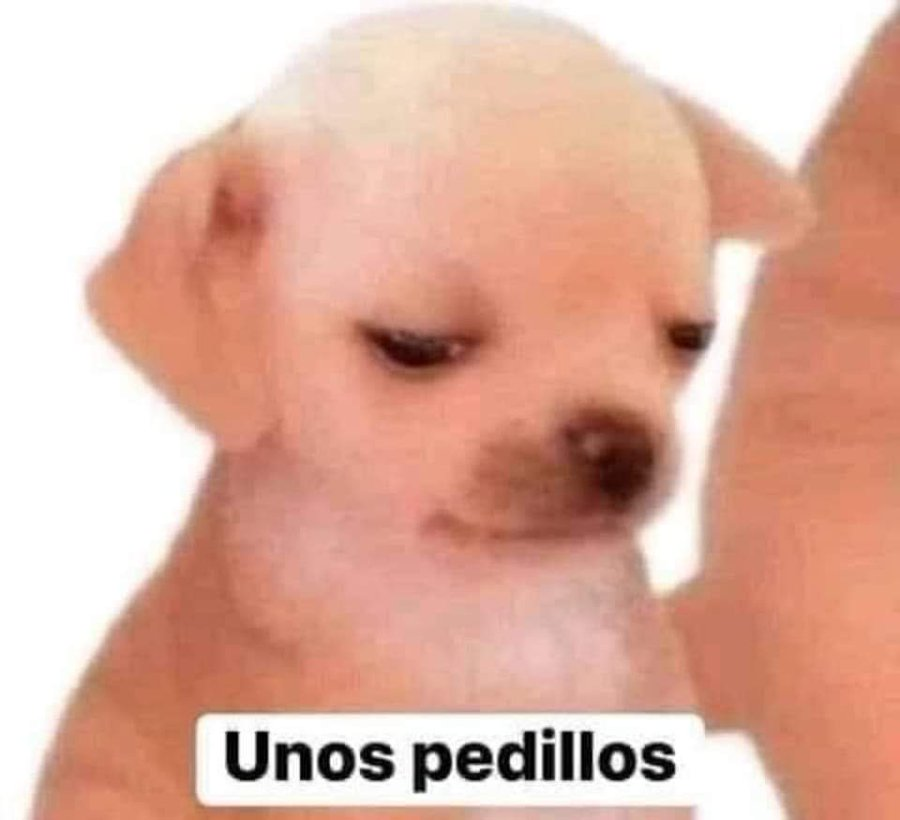

In [ ]:
#df1
amg_año = df.groupby(['Name', 'Sport', 'Year'])['earnings ($ million)'].max().to_frame().reset_index()
amg_año = amg_año.sort_values('Year', ascending=False)
amg_año = amg_año[(amg_año.Year == 1990) | (amg_año.Year == 2000) | (amg_año.Year == 2010) | (amg_año.Year == 2020)]
amg_año

,Name,Sport,Year,earnings ($ million)
29,Carson Wentz,American Football,2020,59.1
134,LeBron James,Basketball,2020,88.2
285,Tiger Woods,Golf,2020,62.3
206,Neymar,Soccer,2020,95.5
102,Kevin Durant,Basketball,2020,63.9
269,Stephen Curry,Basketball,2020,74.4
110,Kirk Cousins,American Football,2020,60.5
40,Cristiano Ronaldo,Soccer,2020,105.0
151,Lionel Messi,Soccer,2020,104.0
244,Roger Federer,Tennis,2020,106.3


# 8. Ganancia total por cada deporte por cada año. ✅💣

In [ ]:
dep_año = df.copy()
dep_año = dep_año.groupby(['Year', 'Sport'])['earnings ($ million)'].sum().to_frame()
dep_año

earnings ($ million)
Year Sport                                  
1990 Basketball                          8.1
     Boxing                             75.7
     Golf                               25.2
     NASCAR                             19.0
1991 Basketball                         16.0
...                                      ...
2020 American Football                 119.6
     Basketball                        226.5
     Golf                               62.3
     Soccer                            304.5
     Tennis                            106.3

[173 rows x 1 columns]

#Crea un tablero en Power BI que represente los aspectos más importantes del dataset, a tu gusto.

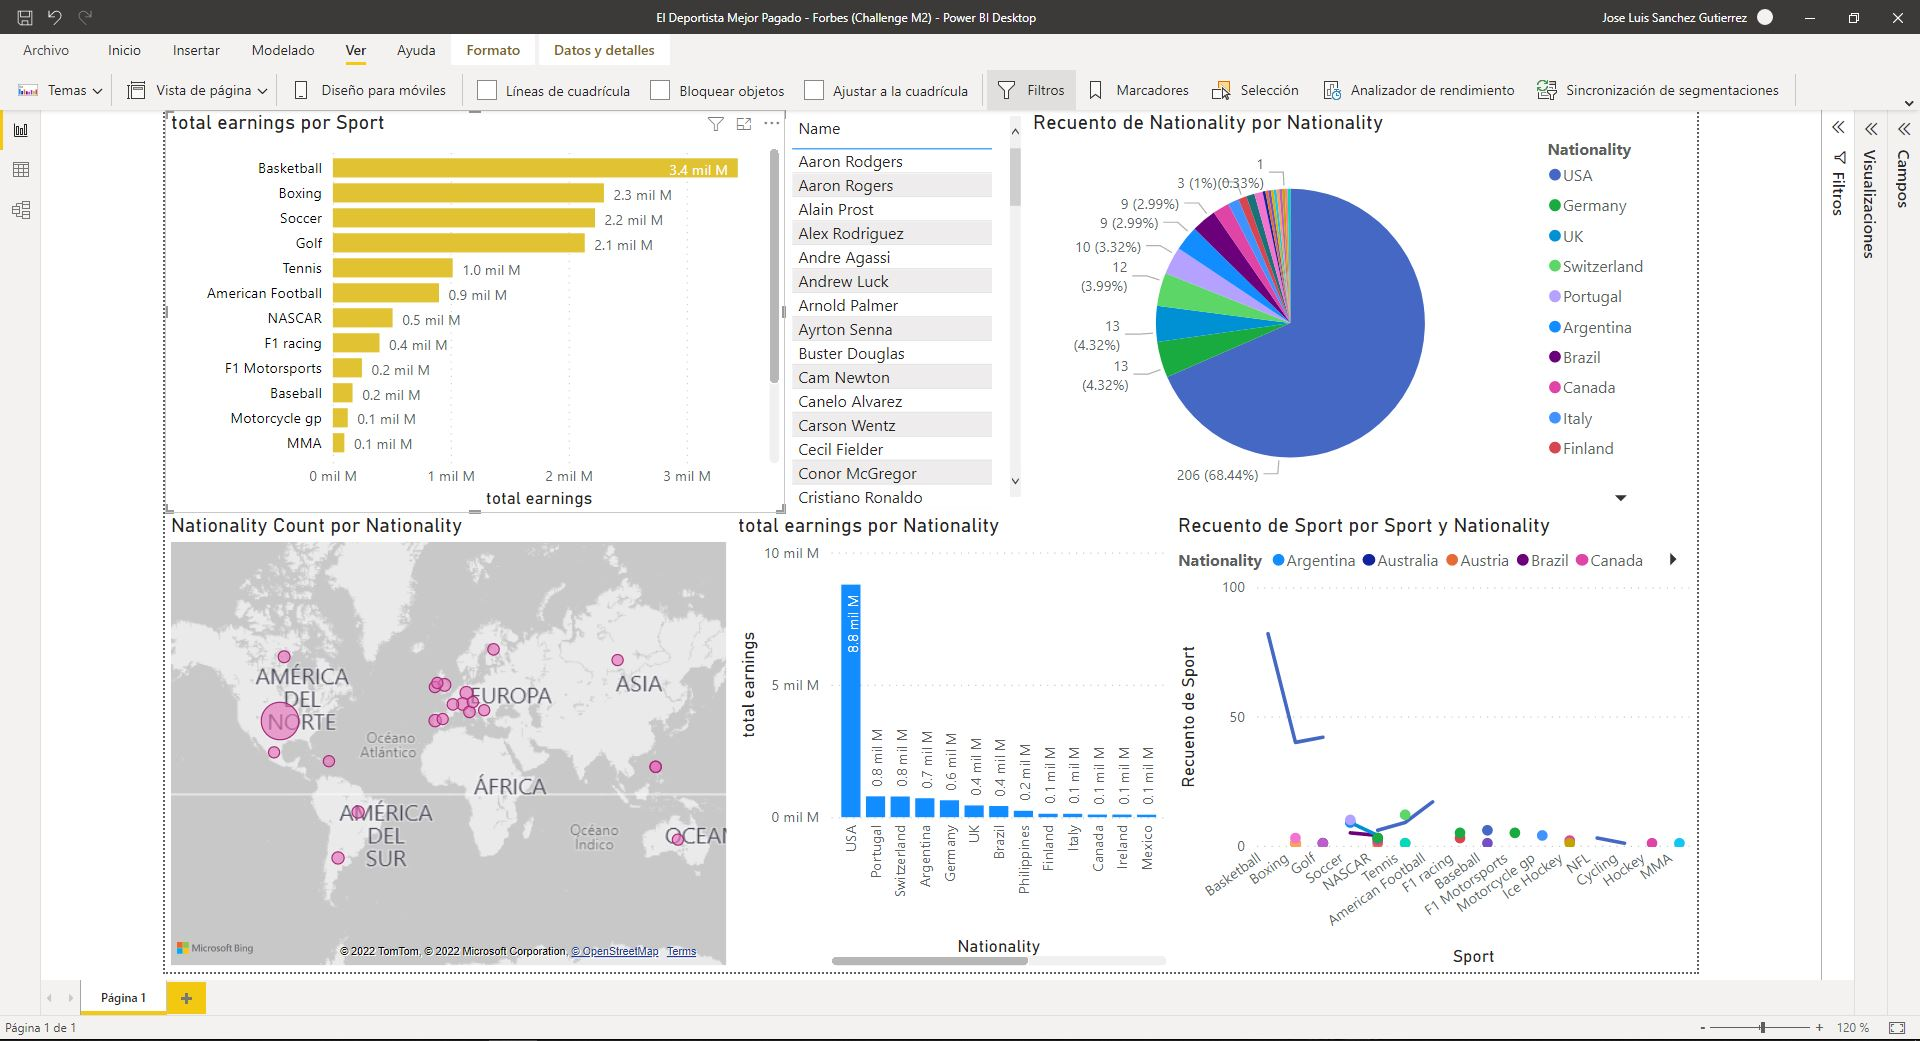